**Анализ данных о розничных продажах в супермаркетах**

Данные взяты с сайта Kaggle

**Используемые колонки:**

**Идентификатор счета-фактуры:** Идентификационный номер счета-фактуры, сгенерированный компьютером.

**Филиал:** Филиал суперцентра (доступны 3 филиала, обозначенные буквами A, B и C).

**Город:** Расположение суперцентров

**Тип клиента:** Тип клиентов, зарегистрированный Участниками для клиентов, использующих карту участника, и Обычный для клиентов без карты участника.

**Пол:** Пол типа клиента

**Линия продуктов:** Общие группы категорий товаров - Электронные аксессуары, Модные аксессуары, Еда и напитки, Здоровье и красота, Дом и образ жизни, Спорт и путешествия

**Цена за единицу:** Цена каждого продукта в $

**Количество:** количество продуктов, купленных клиентом.

**Налог:** 5% налог на покупку клиента

**Итого:** Общая стоимость, включая налог

**Дата: **Дата покупки (запись доступна с января 2019 г. по март 2019 г.)

**Время:** Время покупки (с 10:00 до 21:00)

**Оплата:** оплата, используемая покупателем для покупки (доступны 3 способа — наличные, кредитная карта и электронный кошелек)

**COGS:** Стоимость проданных товаров

**Процент валовой прибыли:** Процент валовой прибыли

**Валовой доход:** Валовой доход

**Рейтинг:** рейтинг стратификации клиентов по их общему опыту покупок (по шкале от 1 до 10).

Импортируем данные:

In [5]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns

sales= pd.read_csv('supermarket_sales_-_Sheet1.csv')
sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


Посмотрим первые 5 строк:

In [117]:
sales.head() 

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Проверим на недостающие значения

In [47]:
sales.isna().sum()

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Total            0
Date             0
Time             0
Payment          0
cogs             0
gross income     0
Rating           0
dtype: int64

Основная информация о данных датасета:

In [48]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Tax 5%         1000 non-null   float64
 9   Total          1000 non-null   float64
 10  Date           1000 non-null   object 
 11  Time           1000 non-null   object 
 12  Payment        1000 non-null   object 
 13  cogs           1000 non-null   float64
 14  gross income   1000 non-null   float64
 15  Rating         1000 non-null   float64
dtypes: float64(6), int64(1), object(9)
memory usage: 125.1+ KB


Количество строк и ячеек:

In [3]:
sales.shape

(1000, 17)

Видим, что обработка недостающих значений не требуется, данные уже чистые.

# Поиск аутлайеров

Нас интересуют особо прибыльные и особо неприбыльные покупки.

In [30]:
sales[(np.abs(stats.zscore(sales['gross margin percentage'])) > 2)]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


Мы видим неожиданный результат. Может быть, с колонкой gross margin percentage что-то не так?

In [31]:
sales['gross margin percentage'].unique()

array([4.76190476])

Опасения подтвердились - колонка заполнена одинаковым числом. В реальном мире так не бывает, чтобы все товары приносили ровно одинаковую прибыль. Возможно, данные синтетические. Удалим эту колонку и проверим, что других таких колонок в датасете нет.

In [33]:
sales = sales.drop(columns='gross margin percentage')
sales.nunique()

Invoice ID       1000
Branch              3
City                3
Customer type       2
Gender              2
Product line        6
Unit price        943
Quantity           10
Tax 5%            990
Total             990
Date               89
Time              506
Payment             3
cogs              990
gross income      990
Rating             61
dtype: int64

Проверим, что gross margin percentage действительно правильно считалась.

In [34]:
(sales['Total']-sales['cogs'])/sales['Total']

0      0.047619
1      0.047619
2      0.047619
3      0.047619
4      0.047619
         ...   
995    0.047619
996    0.047619
997    0.047619
998    0.047619
999    0.047619
Length: 1000, dtype: float64

Посмотрим на покупки, общая стоимость которых превышает среднюю на 2 и 3 стандартных отклонения

In [50]:
best_buys = sales[(stats.zscore(sales['Total'])>2)]
best_buys['Total'].count()

53

In [51]:
best_buys = sales[(stats.zscore(sales['Total'])>3)]
best_buys['Total'].count()

0

Построим гистограмму общей стоимости

/tmp/ipykernel_5637/3469629962.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales['Total'],bins=50)


<AxesSubplot:xlabel='Total', ylabel='Density'>

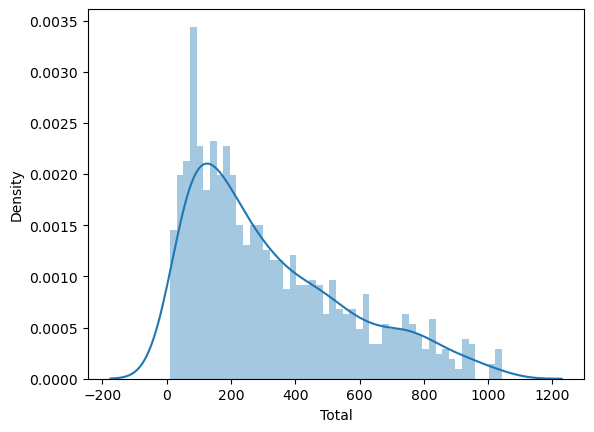

In [116]:
sns.distplot(sales['Total'],bins=50)

# Корреляционная матрица числовых столбцов

Построим визуализацию корреляционной матрицы

<AxesSubplot:>

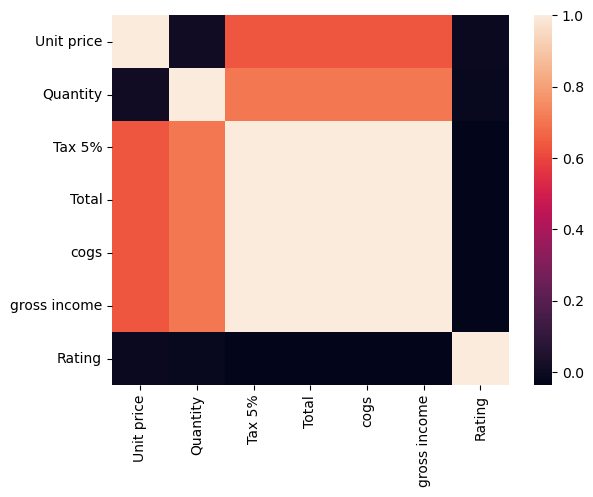

In [61]:
import seaborn as sns
sns.heatmap(sales.corr())

In [60]:
sales.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,-0.036442,1.000000


Вывод: числовые значения в столбцах "Tax 5%", "Total", "cogs", "gross income" не просто сильно скоррелированы, но и линейно зависимы. Можно удалить все, кроме одного из этих столбцов. Оставим Total.

In [62]:
sales = sales.drop(columns=['gross income','cogs','Tax 5%'])

# Данные по отдельным столбцам:

Найдём, сколько данных у нас по отдельным городам:

In [63]:
sales['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

Найдём, сколько данных у нас по статусам покупателей:

In [64]:
sales['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

Найдём, сколько данных у нас по категориям продуктов:

In [65]:
sales['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

Посмотрим какая у нас самая низка и высокая цена за единицу товара, для этого проранжируем данные по возрастанию:

In [66]:
sales['Unit price'].sort_values(ascending=True)

944    10.08
572    10.13
784    10.16
822    10.17
881    10.18
       ...  
283    99.83
494    99.89
930    99.92
122    99.96
983    99.96
Name: Unit price, Length: 1000, dtype: float64

Попробуем вычислить зависимость категории покупок от гендера:


In [67]:
sales.groupby('Product line')['Gender'].value_counts().unstack()

Gender,Female,Male
Product line,,
Electronic accessories,84,86
Fashion accessories,96,82
Food and beverages,90,84
Health and beauty,64,88
Home and lifestyle,79,81
Sports and travel,88,78


Получаем, что женщины чаще всего приобретают аксессуары и реже всего товары для красоты и здоровья, а мужчины, наоборот, покупают средства для красоты и реже всего отдают предпочтение товарам для спорта и путешествия.

Попробуем визуализировать зависимость покупки продуктов определённой линейки от гендера:

<AxesSubplot:xlabel='Gender,Product line'>

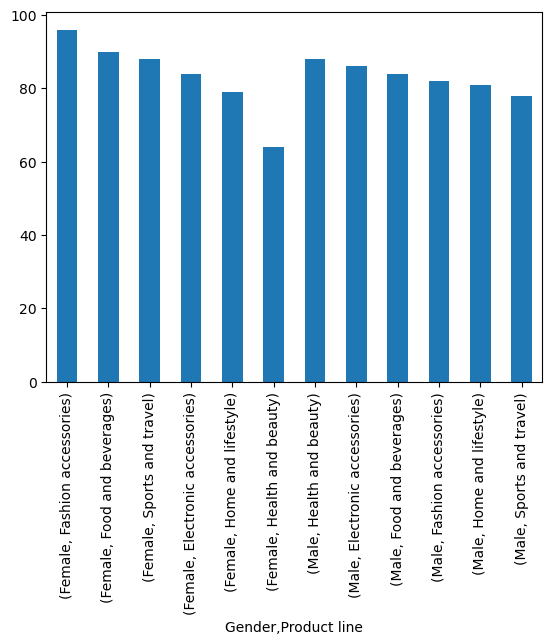

In [68]:
sales.groupby('Gender')['Product line'].value_counts().plot(kind='bar')

Теперь выявим взаимосвязь между городами и категориями товаров: 

In [69]:
sales.groupby('Product line')['City'].value_counts().unstack()

City,Mandalay,Naypyitaw,Yangon
Product line,,,
Electronic accessories,55,55,60
Fashion accessories,62,65,51
Food and beverages,50,66,58
Health and beauty,53,52,47
Home and lifestyle,50,45,65
Sports and travel,62,45,59


Итог: согласно данным, в Мандалайе наибольшим спросом пользуются товары для спорта, в Нейпьидо- еда, в Янгоне- товары для дома.

Сравним данные по общей выручке в городах:

In [70]:
sales.groupby('City')['Total'].sum()

City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Total, dtype: float64

Добавим к полученным данным третий столбец с гендером:

In [71]:
sales.groupby(['City', 'Gender'])['Total'].sum()

City       Gender
Mandalay   Female    52928.2950
           Male      53269.3770
Naypyitaw  Female    61685.4630
           Male      48883.2435
Yangon     Female    53269.1670
           Male      52931.2035
Name: Total, dtype: float64

Посмотрим на отношения между данными по гендеру и категории покупателя:

In [72]:
sales.groupby('Gender')['Customer type'].value_counts().unstack()

Customer type,Member,Normal
Gender,,
Female,261,240
Male,240,259


Получаем, что среди мужчин меньше людей с картой, чем среди женщин. 

Посмотрим на взаимосвязь между типом оплаты и городами:

<AxesSubplot:xlabel='City'>

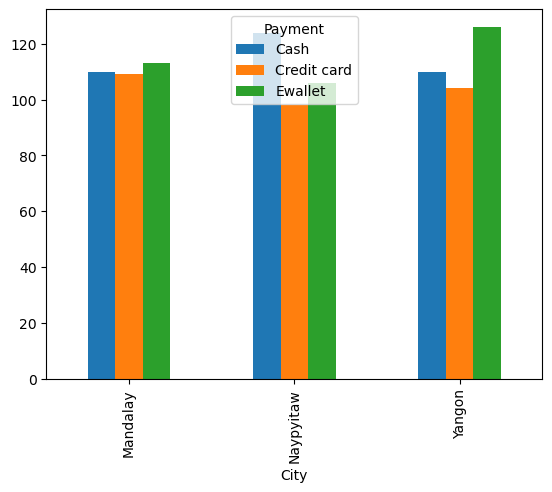

In [73]:
sales.groupby('City')['Payment'].value_counts().unstack().plot(kind='bar')

Вывод:в Мандалайе чаще покупку совершают с помощью электронного кошелька, в Нейпьидо оплата чаще всего происходит наличными, а в Янгоне- тоже электронным кошельком.

Посмотрим также на объемы всех покупок, оплаченных разными методами в трех городах.

<AxesSubplot:xlabel='City'>

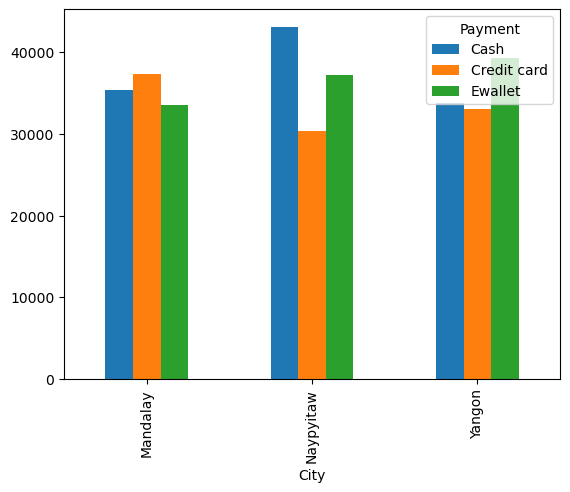

In [98]:
sales.groupby(['City','Payment'])['Total'].sum().unstack().plot(kind='bar')

Можно заметить, что в Мандалайе наибольший объем покупок оплачен с кредиток, в Нейпьидо - кэшем, в Янгуне - электронным кошельком. В реальном мире такая информация может быть полезна для подсчета прибыли, так как разные финансовые сервисы берут разные комиссии.

Посмотрим на распределения общей стоимости покупок, в зависимости от наличия у клиента клубной карты

Member         AxesSubplot(0.1,0.15;0.363636x0.75)
Normal    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

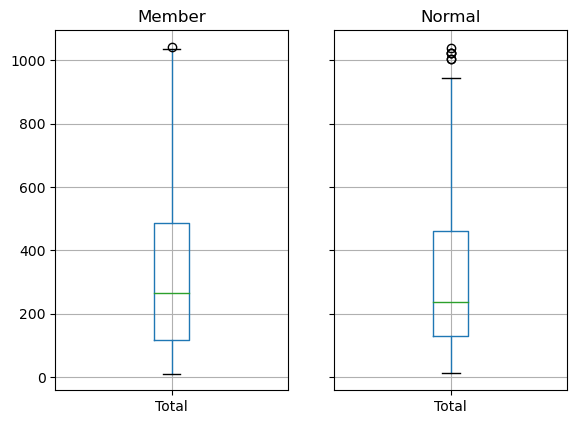

In [77]:
sales.groupby(['Customer type']).boxplot(column='Total')

Как ни странно, распределение сумм покупок для держателей клубной карты почти не отличается. Тем не менее, можно отметить, что медиана у держателей клубной карты чуть больше. Также у держателей клубной карты больше интерквартильный размах (75% - 25%).

Посмотрим на статистики покупок для держателей клубных карт и обычных покупателей.

In [89]:

def range_values(x):
    return x.max() - x.min()

sales.pivot_table(index='Customer type', 
                  values=['Quantity', 'Total', 'Rating'],
                  aggfunc=['mean', 'std', range_values])

mean                             std                        \
               Quantity    Rating       Total  Quantity    Rating       Total   
Customer type                                                                   
Member         5.558882  6.940319  327.791305  2.961592  1.749380  247.993782   
Normal         5.460922  7.005210  318.122856  2.886747  1.688222  243.902800   

              range_values                    
                  Quantity Rating      Total  
Customer type                                 
Member                   9    6.0  1031.9715  
Normal                   9    6.0  1026.5955

Статистики похожи. Странно, что рейтинг, составляемый по общему опыту покупок, у обычных покупателей больше в среднем. 

### Обработаем даты

In [103]:
sales['Date'] = pd.to_datetime(sales['Date'])
print(sales['Date'].min(),sales['Date'].max())

2019-01-01 00:00:00 2019-03-30 00:00:00


Отсортируем данные по датам, чтобы графики корректно отображались

<AxesSubplot:xlabel='Date', ylabel='Total'>

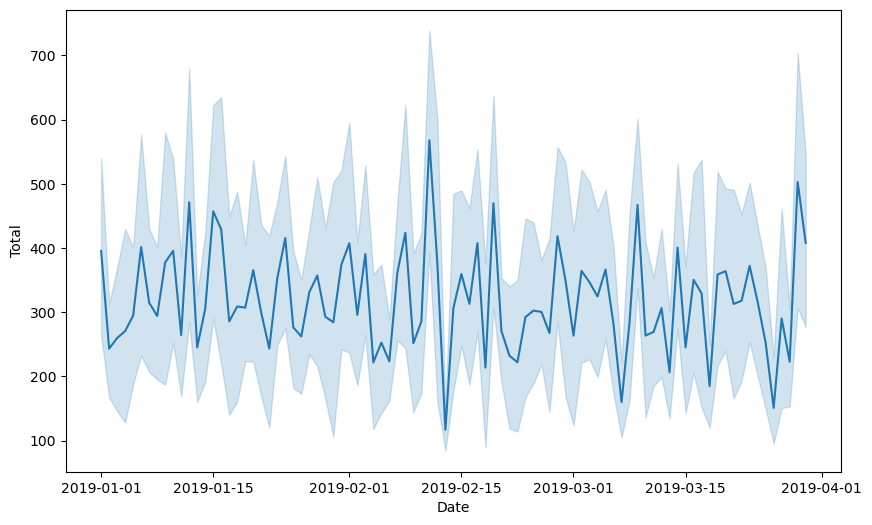

In [110]:
import matplotlib.pyplot as plt
sales = sales.sort_values(by='Date')
plt.figure(figsize=(10, 6))
sns.lineplot(x=sales['Date'], y=sales['Total'])

Данные выглядят как случайный шум. Очевидных трендов не прослеживается. 

Проверим, как соотносятся данные для выходных и обычных дней. Логично предположить, что в выходные покупок совершается или сильно больше, или сильно меньше, чем в будни.

In [155]:
sales_weekend = sales[sales['Date'].dt.weekday.isin([0,1])].sort_values(by='Date')
sales_weekend = sales_weekend.groupby('Date')['Total'].sum()
sales_budni = sales[~sales['Date'].dt.weekday.isin([0,1])].sort_values(by='Date')
sales_budni = sales_budni.groupby('Date')['Total'].sum()

In [148]:
sales_budni

,Total
Date,
2019-01-02,1945.5030
2019-01-03,2078.1285
2019-01-04,1623.6885
2019-01-05,3536.6835
2019-01-06,3614.2050
...,...
2019-03-24,3477.4635
2019-03-27,2902.8195
2019-03-28,2229.4020


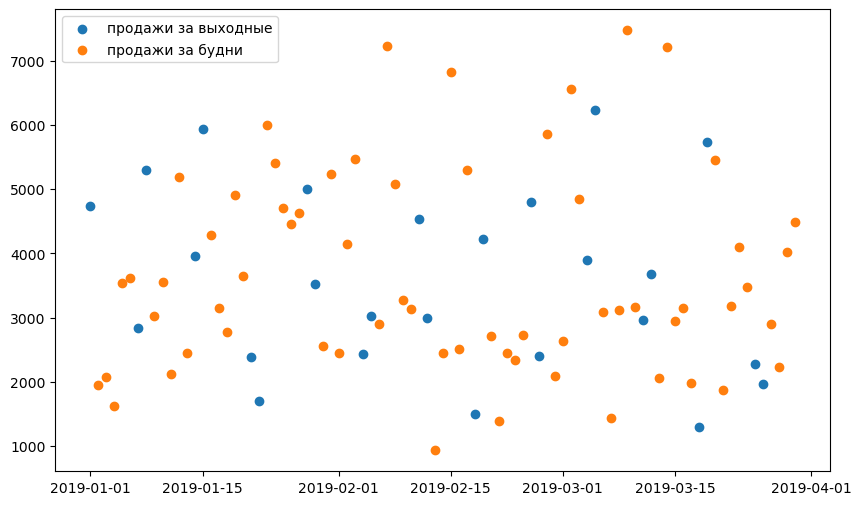

In [158]:
plt.figure(figsize=(10, 6))
plt.scatter(sales_weekend.index,sales_weekend,label = 'продажи за выходные')
plt.scatter(sales_budni.index,sales_budni,label = 'продажи за будни')
plt.legend()

Видно, что значения за выходные не сильно отличаются от значений за будни

Выводы: при анализе датасета с данными по рекордным продажам в 3-х супермаркетах за 3 месяца, состоящего из 1000 строк и 16 колонок, была обнаружена: -основная информация по самым прибыльным и особо неприбыльным покупкам.После применения кода было выявлено, что один из столбцов состоит из искусственно сформированных данных, так как показатели продаж одинаковы. Далее была выявлена взаимосвязь между городами и разными формами покупок, сформировано визуально отображение данных о продажах за будни и выходные, проанализированы тренды, в ходе данного анализа было выявлено, что тенденций в покупках не прослеживается, все они носят стихий характер6 что применительно к маркетинговому анализу может истолковано как отличный знак для создания пиар-компаний и интеграции нейромаркетинговых показателей для продвижения товаров.  